<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None

    kernels = ['linear','rbf']
    degrees = [2, 3]
    Cs = [0.1, 1, 10, 100, 1000, 10000]
    
    for kernel in kernels:
        for C in Cs:
            model = SVC(C=C, kernel=kernel)
            print "Trying model: kernel = %s, C = %.1f" % (model.kernel, model.C)
            accuracy = np.mean(cross_val_score(model, x, y=y, cv=10, n_jobs=-1))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
            
    for C in Cs:
        for degree in degrees:
            model = SVC(C=C, kernel='poly', degree=degree)
            print "Trying model: kernel = %s, degree = %d, C = %.1f" % (model.kernel, model.degree, model.C)
            accuracy = np.mean(cross_val_score(model, x, y=y, cv=10, n_jobs=-1))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
    
    if best_model.kernel is 'poly':
        print "Best model: kernel = %s, degree = %d, C = %.1f" % \
              (best_model.kernel, best_model.degree, best_model.C)
    else:
        print "Best model: kernel = %s, C = %.1f" % (best_model.kernel, best_model.C)
    
    print "Accuracy = %f" % (best_accuracy)
    
    best_model.fit(x, y)
    
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model: kernel = linear, C = 0.1
Trying model: kernel = linear, C = 1.0
Trying model: kernel = linear, C = 10.0
Trying model: kernel = linear, C = 100.0
Trying model: kernel = linear, C = 1000.0
Trying model: kernel = linear, C = 10000.0
Trying model: kernel = rbf, C = 0.1
Trying model: kernel = rbf, C = 1.0
Trying model: kernel = rbf, C = 10.0
Trying model: kernel = rbf, C = 100.0
Trying model: kernel = rbf, C = 1000.0
Trying model: kernel = rbf, C = 10000.0
Trying model: kernel = poly, degree = 2, C = 0.1
Trying model: kernel = poly, degree = 3, C = 0.1
Trying model: kernel = poly, degree = 2, C = 1.0
Trying model: kernel = poly, degree = 3, C = 1.0
Trying model: kernel = poly, degree = 2, C = 10.0
Trying model: kernel = poly, degree = 3, C = 10.0
Trying model: kernel = poly, degree = 2, C = 100.0
Trying model: kernel = poly, degree = 3, C = 100.0
Trying model: kernel = poly, degree = 2, C = 1000.0
Trying model: kernel = poly, degree = 3

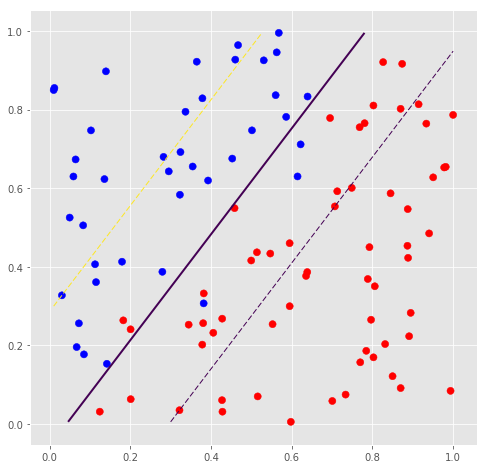

In [29]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model: kernel = linear, C = 0.1
Trying model: kernel = linear, C = 1.0
Trying model: kernel = linear, C = 10.0
Trying model: kernel = linear, C = 100.0
Trying model: kernel = linear, C = 1000.0
Trying model: kernel = linear, C = 10000.0
Trying model: kernel = rbf, C = 0.1
Trying model: kernel = rbf, C = 1.0
Trying model: kernel = rbf, C = 10.0
Trying model: kernel = rbf, C = 100.0
Trying model: kernel = rbf, C = 1000.0
Trying model: kernel = rbf, C = 10000.0
Trying model: kernel = poly, degree = 2, C = 0.1
Trying model: kernel = poly, degree = 3, C = 0.1
Trying model: kernel = poly, degree = 2, C = 1.0
Trying model: kernel = poly, degree = 3, C = 1.0
Trying model: kernel = poly, degree = 2, C = 10.0
Trying model: kernel = poly, degree = 3, C = 10.0
Trying model: kernel = poly, degree = 2, C = 100.0
Trying model: kernel = poly, degree = 3, C = 100.0
Trying model: kernel = poly, degree = 2, C = 1000.0
Trying model: kernel = poly, degree = 3

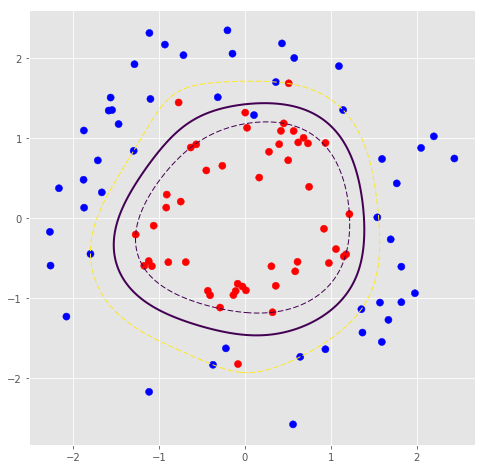

In [30]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model: kernel = linear, C = 0.1
Trying model: kernel = linear, C = 1.0
Trying model: kernel = linear, C = 10.0
Trying model: kernel = linear, C = 100.0
Trying model: kernel = linear, C = 1000.0
Trying model: kernel = linear, C = 10000.0
Trying model: kernel = rbf, C = 0.1
Trying model: kernel = rbf, C = 1.0
Trying model: kernel = rbf, C = 10.0
Trying model: kernel = rbf, C = 100.0
Trying model: kernel = rbf, C = 1000.0
Trying model: kernel = rbf, C = 10000.0
Trying model: kernel = poly, degree = 2, C = 0.1
Trying model: kernel = poly, degree = 3, C = 0.1
Trying model: kernel = poly, degree = 2, C = 1.0
Trying model: kernel = poly, degree = 3, C = 1.0
Trying model: kernel = poly, degree = 2, C = 10.0
Trying model: kernel = poly, degree = 3, C = 10.0
Trying model: kernel = poly, degree = 2, C = 100.0
Trying model: kernel = poly, degree = 3, C = 100.0
Trying model: kernel = poly, degree = 2, C = 1000.0
Trying model: kernel = poly, degree = 3, C

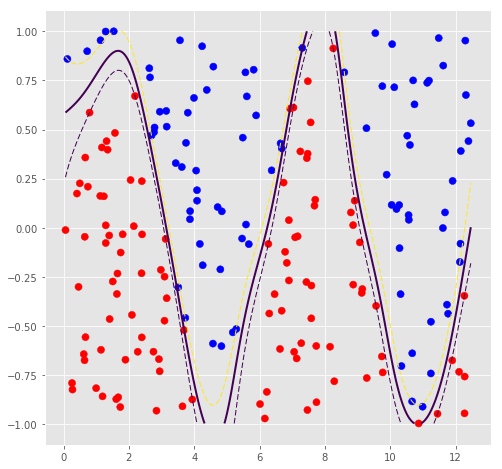

In [31]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [4]:
from scipy import stats

In [5]:
data = pd.read_csv('titanium.csv')
data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [6]:
data_post = pd.DataFrame(data)
data_post['z-score'] = stats.zscore(data.x)
data_post.head()

,x,y,z-score
0,585.0,0.644,-1.697056
1,595.0,0.622,-1.626346
2,605.0,0.638,-1.555635
3,615.0,0.649,-1.484924
4,625.0,0.652,-1.414214


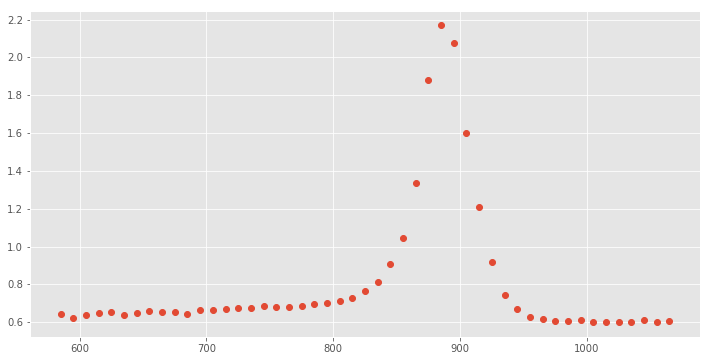

In [7]:
plt.plot(data_post.x.values, data_post.y.values, 'o')
plt.show()

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
C = np.logspace(-2, 2, 10)
C

array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])

In [10]:
X = data_post.drop(['y'], axis=1)
y = data_post.y

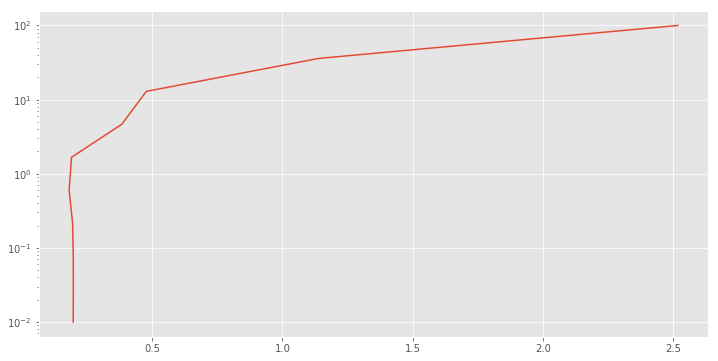

In [11]:
linear_error = []
for c in C:
    model = SVR(kernel='linear', tol=0.01, C=c)
    model.fit(X, y)
    linear_error.append(mean_absolute_error(y, model.predict(X)))

plt.semilogy(linear_error, C)
plt.show()

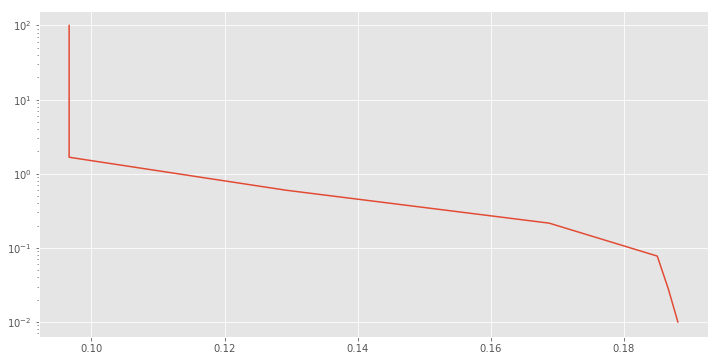

In [12]:
rbf_error = []
for c in C:
    model = SVR(kernel='rbf', gamma=6, coef0=1, tol=0.01, C=c)
    model.fit(X, y)
    rbf_error.append(mean_absolute_error(y, model.predict(X)))

plt.semilogy(rbf_error, C)
plt.show()

In [ ]:
# СЧИТАЛОСЬ НОЧЬ - НЕ ДОСЧИТАЛОСЬ
poly_error = []
for c in C:
    model = SVR(kernel='poly', degree=3, gamma=6, 
                coef0=1, tol=0.01, C=c)
    model.fit(X, y)
    poly_error.append(mean_absolute_error(y, model.predict(X)))
    
plt.semilogy(poly_error, C)
plt.show()

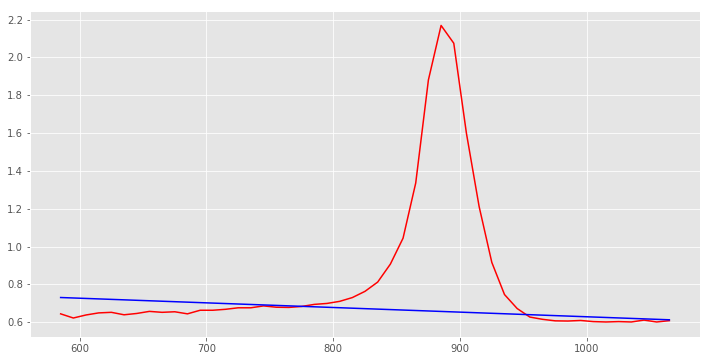

In [13]:
model = SVR(kernel='linear', tol=0.01, C=C[linear_error.index(min(linear_error))])
model.fit(X, y)
y1 = model.predict(X)
plt.plot(data_post.x.values, data_post.y.values, color='red')
plt.plot(data_post.x.values, y1, color='blue')
plt.show()
# Первая степень полинома = недообучение

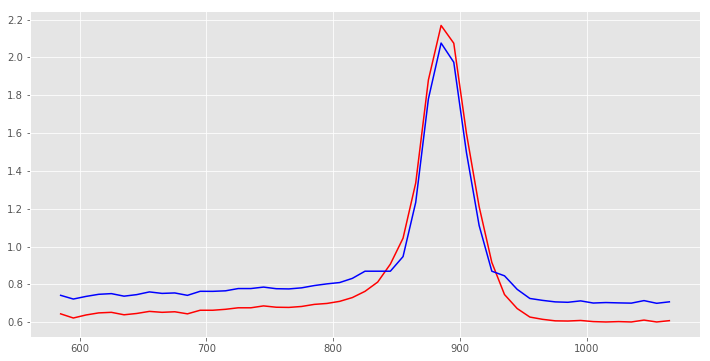

In [14]:
model = SVR(kernel='rbf', gamma=6, coef0=1, tol=0.01, C=C[rbf_error.index(min(rbf_error))])
model.fit(X, y)
y1 = model.predict(X)
plt.plot(data_post.x.values, data_post.y.values, color='red')
plt.plot(data_post.x.values, y1, color='blue')
plt.show()
# Мало данных, потому есть некоторое недообучение

In [15]:
# Переобучение возникнет при неконтролируемом увеличении степеней в полиномиальном ядре
# При неконтролируемом изменении параметров могут возникать эффекты недообучения и переобучения

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [68]:
f = open('war_and_peace_en.txt', 'r')
data_en = f.read().split('\n')[:-1]
df_en = pd.DataFrame(data=data_en, columns=['word'])
df_en['label'] = 0
print len(df_en)
df_en.head()

5044


,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


In [69]:
f = open('war_and_peace_es.txt', 'r')
data_es = f.read().split('\n')[:-1]
df_es = pd.DataFrame(data=data_es, columns=['word'])
df_es['label'] = 1
print len(df_es)
df_es.head()

6359


,word,label
0,guerra,1
1,pace,1
2,lev,1
3,nicoevic,1
4,tolstj,1


In [70]:
df = pd.concat([df_en, df_es], ignore_index=True)
df['index'] = df.index
df

,word,label,index
0,war,0,0
1,and,0,1
2,peace,0,2
3,leo,0,3
4,tolstoy,0,4
5,book,0,5
6,one,0,6
7,chapter,0,7
8,well,0,8
9,prince,0,9


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [71]:
from sklearn.cross_validation import train_test_split

In [72]:
RND_SEED = 100500

In [132]:
df_r = df.sample(n=1000, random_state=RND_SEED)
df_r = df_r.reset_index().drop(['level_0'], axis=1)
df_r['index'] = df_r.index
df_r.head()

,word,label,index
0,continued,0,0
1,vous,1,1
2,guerre,1,2
3,spaventata,1,3
4,russo,1,4


In [133]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_r.index.values, df_r.label.values, train_size=0.6, test_size=0.4)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [134]:
def wf_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses the Wagner-Fischer algorithm.
    Usage::
        >>> wf_levenshtein('kitten', 'sitting')
        3
        >>> wf_levenshtein('kitten', 'kitten')
        0
        >>> wf_levenshtein('', '')
        0
    """
    len_1 = len(string_1) + 1
    len_2 = len(string_2) + 1

    d = [0] * (len_1 * len_2)

    for i in range(len_1):
        d[i] = i
    for j in range(len_2):
        d[j * len_1] = j

    for j in range(1, len_2):
        for i in range(1, len_1):
            if string_1[i - 1] == string_2[j - 1]:
                d[i + j * len_1] = d[i - 1 + (j - 1) * len_1]
            else:
                d[i + j * len_1] = min(
                   d[i - 1 + j * len_1] + 1,        # deletion
                   d[i + (j - 1) * len_1] + 1,      # insertion
                   d[i - 1 + (j - 1) * len_1] + 1,  # substitution
                )

    return d[-1]

def string_kernel(X, Y, D, K, gamma=1):
    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            gram_matrix[i, j] = np.exp((-1)*gamma*(K(D.word[x], D.word[y])**2))
    return gram_matrix

In [135]:
G = string_kernel(X_train, X_train, df_r, wf_levenshtein)

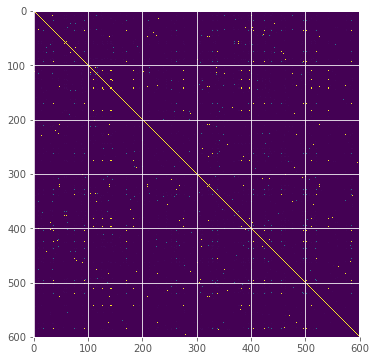

In [136]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [138]:
from sklearn.metrics import accuracy_score

In [144]:
G_train = string_kernel(X_train, X_train, df_r, wf_levenshtein)
G_test = string_kernel(X_test, X_train, df_r, wf_levenshtein)

In [149]:
Cs = [0.1, 1, 10, 100, 1000, 10000]
acc = []
for C in Cs:
    model = SVC(kernel='precomputed', C=C)
    model.fit(G_train, y_train)
    y_pred = model.predict(G_test)
    a = accuracy_score(y_test, y_pred)
    acc.append(a)
    print "C=%.1f, accuracy=%f" % (C, a)

C=0.1, accuracy=0.617500
C=1.0, accuracy=0.772500
C=10.0, accuracy=0.775000
C=100.0, accuracy=0.775000
C=1000.0, accuracy=0.775000
C=10000.0, accuracy=0.775000
